In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from scipy.stats import entropy
from collections import Counter
from activ import load_data
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as _sch

In [16]:
nmfdata = load_data(uoinmf=True)

In [17]:
nmf_oc = nmfdata.outcomes
nmf_oc.shape

(247, 6)

In [24]:
w1 = nmf_oc[:,0]
w2 = nmf_oc[:,1]
w3 = nmf_oc[:,2]
w4 = nmf_oc[:,3]
w5 = nmf_oc[:,4]
w6 = nmf_oc[:,5]
ws = [w1, w2, w3, w4, w5, w6]

In [39]:
w1

array([ 0.        ,  0.17543654,  0.        ,  1.56255807,  0.        ,
        1.14346396,  0.        ,  0.18096641,  0.84609467,  0.0596198 ,
        0.37561887,  0.81087367,  2.45431001,  0.        ,  0.        ,
        0.        ,  0.        ,  0.09864733,  0.        ,  0.53854979,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.68482645,  0.        ,  0.6466536 ,  0.12505565,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.87021477,  0.        ,  0.        ,  0.60323074,
        0.        ,  0.        ,  0.04494566,  0.        ,  0.        ,
        0.        ,  0.24019545,  0.93774475,  1.4384876 ,  0.44095806,
        0.13132882,  0.        ,  1.43355779,  2.1936881 ,  0.26626697,
        0.36957953,  0.        ,  0.        ,  1.63075135,  0.84650731,
        0.20710802,  0.        ,  0.49955242,  0.33490584,  0.05617304,
        0.        ,  1.30001243,  0.        ,  1.192265  ,  0.71

In [25]:
file = '/Users/ahyeon/Desktop/activ misc/sweep_u2-10_c2-50_i50_raw-oc-cluster_uoinmf-bm-predict/umap_clustering_sweep.h5'

In [26]:
f = h5py.File(file, 'r')

In [31]:
umap_dims = f['umap_dimensions'][:]
score = f['score'][:]
norm_score = f['norm_score'][:]
clusters = f['clusters'][:]
cluster_sizes = f['cluster_sizes'][:]
emb = f['umap_embeddings'][:]
scale = f['umap_embeddings_dimscale'][:][:54]

In [32]:
for dim in umap_dims:
    all_dmat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='mahalanobis')
        all_dmat[:,x] = dmat
    mean = all_dmat.mean(axis=1)

In [33]:
def calc_entropy(gose_scores):
    probs = np.array(list(Counter(gose_scores).values()))/len(gose_scores)
    return entropy(probs, base=2.0)

In [42]:
def entropy_across_clusters(cluster_sizes, data):
    values = []
    tree = _sch.linkage(mean, method='ward')
    labels = _sch.cut_tree(tree, cluster_sizes)

    for ii,c in enumerate(cluster_sizes):
        entropies = []
        for label in np.unique(labels[:,ii]):
            scores = data[labels[:,ii]==label]
            ent = calc_entropy(scores)
            entropies.append(ent)
        v = np.mean(entropies)
        values.append(v)
    return values

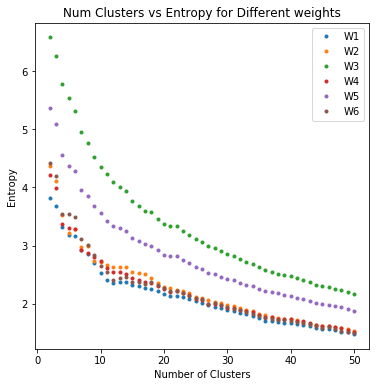

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize=(6,6))
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w1), '.', label='W1')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w2), '.', label='W2')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w3), '.', label='W3')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w4), '.', label='W4')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w5), '.', label='W5')
plt.plot(cluster_sizes, entropy_across_clusters(cluster_sizes, w6), '.', label='W6')
plt.xlabel('Number of Clusters')
plt.ylabel('Entropy')
plt.title('Num Clusters vs Entropy for Different weights')
plt.legend() 
plt.show()
plt.savefig('/Users/ahyeon/Desktop/activ misc/weights_entropy.pdf')